## Analysis Needed

Help the fitness studio explore interest in workouts at a global and national level.

When was the global search for 'workout' at its peak? Save the year of peak interest as a string named year_str in the format "yyyy".

Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.

What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.

You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

## Lodaing the CSV Datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

workout_df = pd.read_csv("data/workout.csv")
three_keywords_df = pd.read_csv("data/three_keywords.csv")
workout_geo_df = pd.read_csv("data/workout_geo.csv")
three_keywords_geo_df = pd.read_csv("data/three_keywords_geo.csv")

## Checking the Dataframe's Structures

In [9]:
print("Workout data:")
print(workout_df.head())
print("\nThree keywords data:")
print(three_keywords_df.head())
print("\nWorkout geo data:")
print(workout_geo_df.head())
print("\nThree keywords geo data:")
print(three_keywords_geo_df.head())

Workout data:
     month  workout_worldwide
0  2018-03                 59
1  2018-04                 61
2  2018-05                 57
3  2018-06                 56
4  2018-07                 51

Three keywords data:
     month  home_workout_worldwide  gym_workout_worldwide  home_gym_worldwide
0  2018-03                      12                     16                  10
1  2018-04                      12                     18                  10
2  2018-05                      13                     16                   9
3  2018-06                      12                     17                   9
4  2018-07                      12                     17                   9

Workout geo data:
                             country  workout_2018_2023
0                               Guam                NaN
1  Falkland Islands (Islas Malvinas)                NaN
2                       Cook Islands                NaN
3                             Brunei                NaN
4                

## Extracting the maximum search interest doing some preprocessing

In [10]:
# Step 1: Convert the 'month' column to datetime format
workout_df['month'] = pd.to_datetime(workout_df['month'])
print("Converted 'month' column to datetime format:")
print(workout_df['month'].head())

# Step 2: Find the index of the maximum search interest
max_index = workout_df['workout_worldwide'].idxmax()
print(f"\nIndex of peak interest in 'workout': {max_index}")

# Step 3: Extract the corresponding month using the index
peak_month = workout_df.loc[max_index, 'month']
print(f"Month with the highest search interest: {peak_month}")

# Step 4: Extract the year and format it as a string
year_str = peak_month.strftime("%Y")
print(f"Year of peak interest: {year_str}")

# Step 5: Display the summary
print(f"\nThe global search for 'workout' peaked in {peak_month.strftime('%B %Y')} (Year: {year_str})")

Converted 'month' column to datetime format:
0   2018-03-01
1   2018-04-01
2   2018-05-01
3   2018-06-01
4   2018-07-01
Name: month, dtype: datetime64[ns]

Index of peak interest in 'workout': 25
Month with the highest search interest: 2020-04-01 00:00:00
Year of peak interest: 2020

The global search for 'workout' peaked in April 2020 (Year: 2020)


## Visualising the data by highlighting the peak interest time

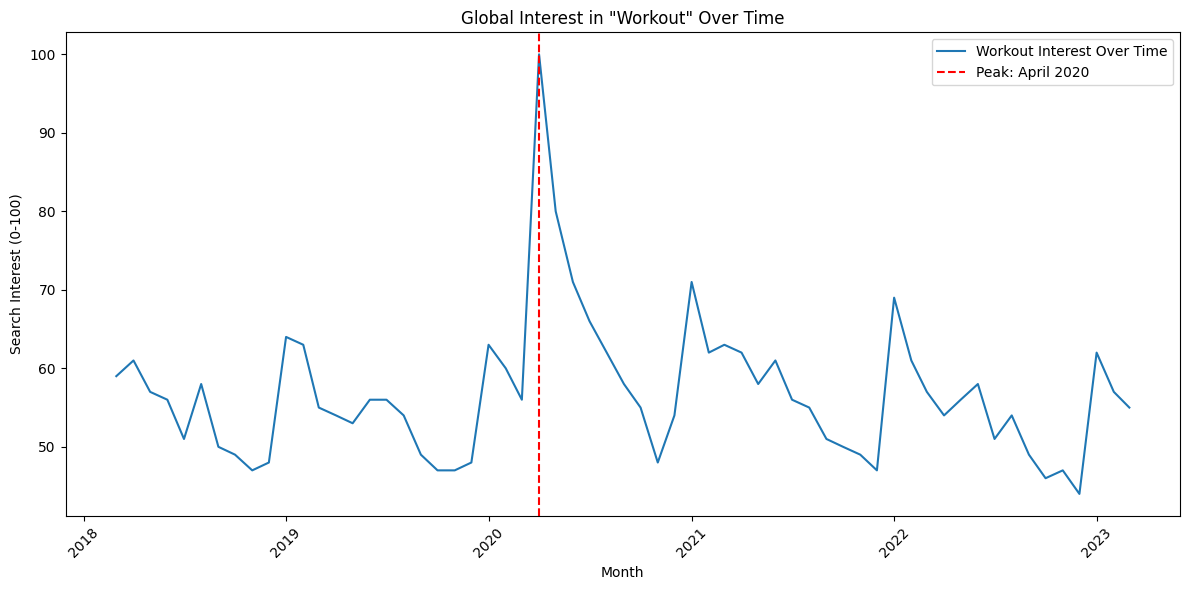

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(workout_df['month'], workout_df['workout_worldwide'], label='Workout Interest Over Time')
plt.title('Global Interest in "Workout" Over Time')
plt.xlabel('Month')
plt.ylabel('Search Interest (0-100)')
plt.axvline(peak_month, color='red', linestyle='--', label=f'Peak: {peak_month.strftime("%B %Y")}')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Converting the 'month' column to datetime from three_keywords dataframe

In [ ]:
three_keywords_df['month'] = pd.to_datetime(three_keywords_df['month'])
print("✅ 'month' column successfully converted to datetime format.\n")
print("Preview of the converted 'month' column:")
print(three_keywords_df['month'].head(), "\n")


✅ 'month' column successfully converted to datetime format.

Preview of the converted 'month' column:
0   2018-03-01
1   2018-04-01
2   2018-05-01
3   2018-06-01
4   2018-07-01
Name: month, dtype: datetime64[ns] 



## Filtering the Dataset and Defining the COVID peak period

In [18]:
covid_start = pd.to_datetime('2020-03-01')
covid_end = pd.to_datetime('2021-12-31')
print(f"Defined COVID period from {covid_start.date()} to {covid_end.date()}\n")
covid_data = three_keywords_df[(three_keywords_df['month'] >= covid_start) & 
                                (three_keywords_df['month'] <= covid_end)]
print(f"🔍 Filtered {len(covid_data)} rows of data during the COVID period.\n")


Defined COVID period from 2020-03-01 to 2021-12-31

🔍 Filtered 22 rows of data during the COVID period.



In [20]:
latest_month = three_keywords_df['month'].max()
current_data = three_keywords_df[three_keywords_df['month'] == latest_month]
print(f"Latest data is from: {latest_month.strftime('%B %Y')}")
print("Here's a preview of the most recent data:")
print(current_data[['month', 'home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']], "\n")

Latest data is from: March 2023
Here's a preview of the most recent data:
        month  home_workout_worldwide  gym_workout_worldwide  \
60 2023-03-01                      13                     19   

    home_gym_worldwide  
60                  12   



## Finding the most popular key word by analysing the popularity

In [22]:
covid_columns = ['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']
covid_means = covid_data[covid_columns].mean()
print("Average search interest during the COVID period:")
print(covid_means, "\n")
peak_covid = covid_means.idxmax().replace('_worldwide', '')
print(f"Most popular keyword during COVID pandemic: **{peak_covid.replace('_', ' ').title()}**\n")


Average search interest during the COVID period:
home_workout_worldwide    22.954545
gym_workout_worldwide     14.000000
home_gym_worldwide        18.500000
dtype: float64 

Most popular keyword during COVID pandemic: **Home Workout**



## Checking the popularity for the latest month's data

In [24]:
current_columns = ['home_workout_worldwide', 'gym_workout_worldwide', 'home_gym_worldwide']
current_values = current_data[current_columns].iloc[0]
print("Keyword popularity in the most recent month:")
print(current_values, "\n")
current = current_values.idxmax().replace('_worldwide', '')
print(f"Most popular keyword currently: **{current.replace('_', ' ').title()}**\n")

Keyword popularity in the most recent month:
home_workout_worldwide    13
gym_workout_worldwide     19
home_gym_worldwide        12
Name: 60, dtype: int64 

Most popular keyword currently: **Gym Workout**



## Visualising the trends over time

C:\Users\daksh\AppData\Local\Temp\ipykernel_38584\2392602998.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\daksh\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


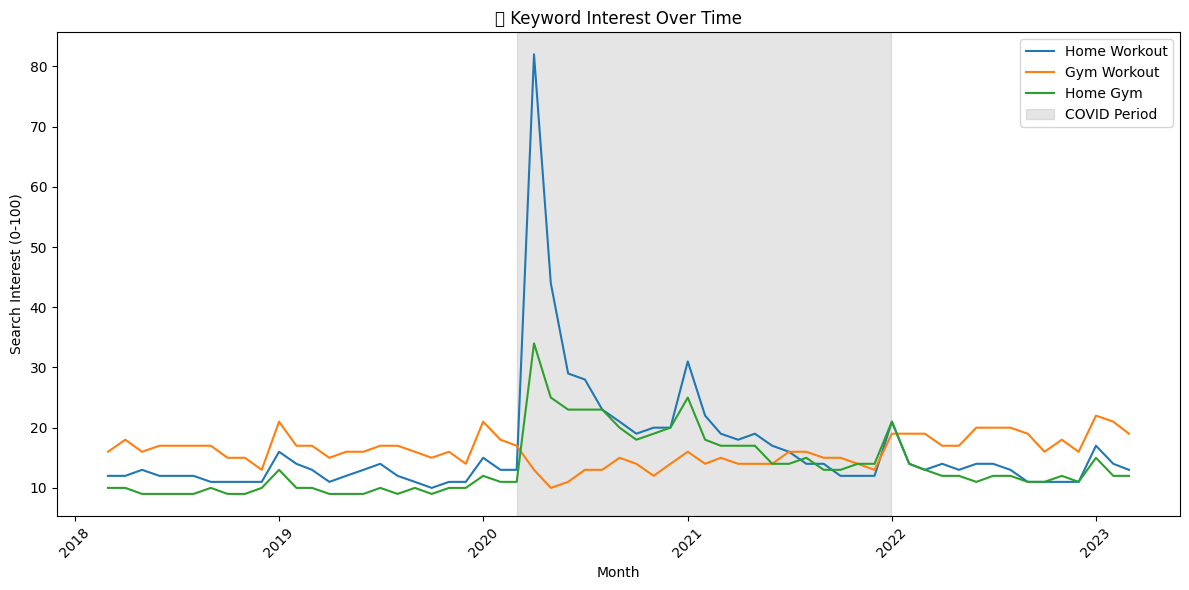

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for column in covid_columns:
    keyword = column.replace('_worldwide', '').replace('_', ' ').title()
    plt.plot(three_keywords_df['month'], three_keywords_df[column], label=keyword)

# Highlight the COVID period on the chart
plt.axvspan(covid_start, covid_end, alpha=0.2, color='gray', label='COVID Period')

# Customize the plot
plt.title('📊 Keyword Interest Over Time')
plt.xlabel('Month')
plt.ylabel('Search Interest (0-100)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Filtering Data for the Countries we are interested to analyse upon

In [31]:
countries_of_interest = ['United States', 'India', 'Australia', 'Japan',]
print("Countries we will analyze:")
for c in countries_of_interest:
    print(f"  • {c}")
print()
filtered_countries = workout_geo_df[workout_geo_df['country'].isin(countries_of_interest)]
print(f"Filtered data contains {len(filtered_countries)} rows.")
print("Preview of filtered data:")
print(filtered_countries.head(), "\n")

Countries we will analyze:
  • United States
  • India
  • Australia
  • Japan

Filtered data contains 4 rows.
Preview of filtered data:
           country  workout_2018_2023
5    United States              100.0
18       Australia               77.0
83           India               33.0
216          Japan                1.0 



In [32]:
idx_max = filtered_countries['workout_2018_2023'].idxmax()
top_country = filtered_countries.loc[idx_max, 'country']
top_value = filtered_countries.loc[idx_max, 'workout_2018_2023']
print("Step 3: Peak interest calculation")
print(f"  • Country with highest interest: {top_country}")
print(f"  • Interest value (0–100 scale): {top_value}\n")
print(f"Summary: From 2018 to 2023, search interest in “workout” was highest in {top_country} (score of {top_value}).\n")

Step 3: Peak interest calculation
  • Country with highest interest: United States
  • Interest value (0–100 scale): 100.0

Summary: From 2018 to 2023, search interest in “workout” was highest in United States (score of 100.0).



## Visualising the filtered analysis we made

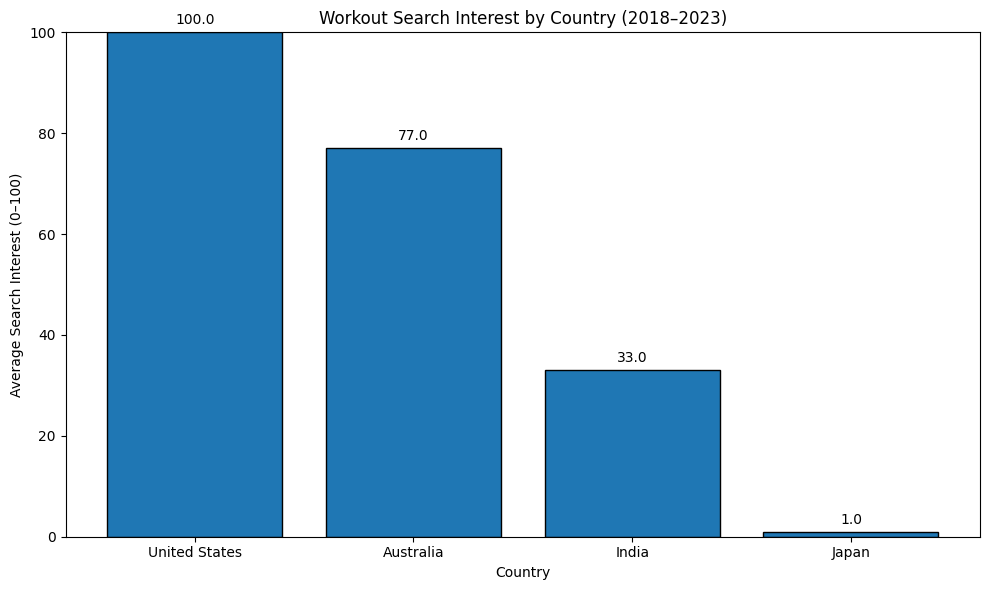

In [33]:
plt.figure(figsize=(10, 6))
bars = plt.bar(filtered_countries['country'], filtered_countries['workout_2018_2023'], edgecolor='black')
plt.title('Workout Search Interest by Country (2018–2023)')
plt.xlabel('Country')
plt.ylabel('Average Search Interest (0–100)')
plt.ylim(0, 100)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Home Workout Interest Comparison: Philippines vs Malaysia

In [35]:
geo_country_column = three_keywords_geo_df.columns[0]
print(f"Step 1: Country column detected as: '{geo_country_column}'\n")
home_workout_column = [col for col in three_keywords_geo_df.columns
                       if 'home_workout' in col.lower()][0]
print(f"Step 2: Home‑workout interest column detected as: '{home_workout_column}'\n")

# Specified which countries to compare
home_workout_countries = ['Philippines', 'Malaysia']
print("Step 3: Comparing home‑workout interest between:")
for c in home_workout_countries:
    print(f"  • {c}")
print()

# Filtered the DataFrame down to just those rows
filtered_home_workout = three_keywords_geo_df[
    three_keywords_geo_df[geo_country_column].isin(home_workout_countries)
]
print(f"Step 4: Filtered data contains {len(filtered_home_workout)} rows:")
print(filtered_home_workout[[geo_country_column, home_workout_column]], "\n")

# Determining which country has the highest home‑workout interest
idx_max = filtered_home_workout[home_workout_column].idxmax()
home_workout_geo = filtered_home_workout.loc[idx_max, geo_country_column]
max_value = filtered_home_workout.loc[idx_max, home_workout_column]
print("Step 5: Peak home‑workout interest calculation")
print(f"  • Country with highest interest: {home_workout_geo}")
print(f"  • Interest score (0–100 scale): {max_value}\n")
print(f"Summary: Between the Philippines and Malaysia, **{home_workout_geo}** shows higher search interest in “home workout” (score of {max_value}).")


Step 1: Country column detected as: 'Country'

Step 2: Home‑workout interest column detected as: 'home_workout_2018_2023'

Step 3: Comparing home‑workout interest between:
  • Philippines
  • Malaysia

Step 4: Filtered data contains 2 rows:
        Country  home_workout_2018_2023
23  Philippines                    52.0
61     Malaysia                    47.0 

Step 5: Peak home‑workout interest calculation
  • Country with highest interest: Philippines
  • Interest score (0–100 scale): 52.0

Summary: Between the Philippines and Malaysia, **Philippines** shows higher search interest in “home workout” (score of 52.0).
